Task 1


In [4]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


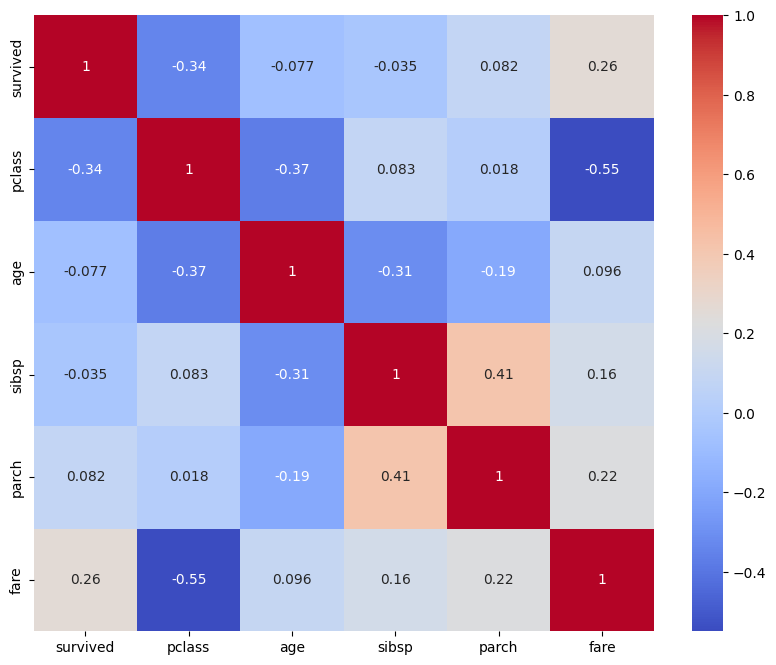

In [8]:
numeric_cols = titanic.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
from sklearn.feature_selection import mutual_info_classif

numerical_features = titanic.select_dtypes(include=['float64', 'int64']).dropna()

X = numerical_features.drop('survived', axis=1)
y = numerical_features['survived']
mutual_info = mutual_info_classif(X, y)

mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info}).sort_values(by='Mutual Information', ascending=False)
print(mi_df)


  Feature  Mutual Information
4    fare            0.129414
0  pclass            0.068578
1     age            0.033331
2   sibsp            0.000000
3   parch            0.000000


Task 2

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(numerical_features_scaled, columns=X.columns)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy before transformation:', accuracy_score(y_test,y_pred))

model.fit(X_train_scaled,y_train_scaled)
y_pred_scaled = model.predict(X_test_scaled)
print('Accuracy after transformation:', accuracy_score(y_test, y_pred_scaled))

Accuracy before transformation: 0.7069767441860465
Accuracy after transformation: 0.7069767441860465


Task 3

In [16]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [20]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

X = titanic[['pclass', 'age', 'fare', 'sibsp', 'parch']].dropna()
y = titanic['survived'][X.index]

X_new = titanic[['pclass', 'age', 'fare', 'family_size']].dropna()
y_new = titanic['survived'][X_new.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy with original features:', accuracy_score(y_test, y_pred))

model.fit(X_train_new, y_train_new)
y_pred_new = model.predict(X_test_new)
print('Accuracy with new features:', accuracy_score(y_test_new, y_pred_new))

Accuracy with original features: 0.7069767441860465
Accuracy with new features: 0.7069767441860465


Task 4

In [23]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['PRICE'] = california.target

california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
from sklearn.preprocessing import PolynomialFeatures

X = california_df.drop('PRICE',axis=1)
y = california_df['PRICE']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly , y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE without polynomial features:', mean_squared_error(y_test, y_pred))

model.fit(X_train_poly, y_train)
y_pred_poly = model.predict(X_test_poly)
print('MSE with polynomial features:',mean_squared_error(y_test, y_pred_poly))

MSE without polynomial features: 0.5305677824766757
MSE with polynomial features: 0.4549723389281423


Task 5

In [27]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

titanic_encoded = pd.get_dummies(titanic, columns=['sex','embarked'])

le = LabelEncoder()
titanic['sex_encoded'] = le.fit_transform(titanic['sex'])

In [32]:
titanic_encoded = pd.get_dummies(titanic, drop_first=True)

X = titanic_encoded.drop(['survived'], axis=1).dropna()
y = titanic_encoded['survived'][X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy with one-hot encoding:', accuracy_score(y_test, y_pred))

titanic['sex_encoded'] = titanic['sex'].map({'male': 1, 'female': 0})

X_le = titanic[['pclass', 'age', 'fare', 'sex_encoded']].dropna()
y_le = titanic['survived'][X_le.index]

X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size=0.3, random_state=42)

model.fit(X_train_le, y_train_le)
y_pred_le = model.predict(X_test_le)
print('Accuracy with label encoding:', accuracy_score(y_test_le, y_pred_le))


Accuracy with one-hot encoding: 1.0
Accuracy with label encoding: 0.7674418604651163
